In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error # 테스트 세트에 대한 평균 절댓값 오차를 계산하는 class
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.special import softmax
import random
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from scipy.stats import uniform, randint

In [2]:
student_data = pd.read_csv('C:\\Users\\USER\\Downloads\\train.csv')

1. 삭제해야 할 컬럼 정리
2. 범주형 데이터 원-핫 인코딩
3. 

In [3]:
student_data.head(11)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,M,16,U,LE3,T,4,2,teacher,other,...,4,5,1,1,3,5,2,15,15,16
1,GP,M,15,U,GT3,T,4,4,services,services,...,4,3,1,1,1,5,0,17,16,17
2,GP,M,18,U,LE3,T,3,3,services,health,...,3,2,4,2,4,4,13,6,6,8
3,GP,F,16,U,GT3,T,2,3,services,teacher,...,2,3,1,1,1,3,2,16,16,17
4,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,3,3,2,3,5,6,9,9,10
5,GP,M,17,U,LE3,T,4,4,teacher,other,...,4,4,4,1,3,5,0,13,11,10
6,GP,M,15,U,GT3,T,4,4,health,health,...,5,4,2,1,1,5,0,12,15,15
7,GP,M,17,U,GT3,T,4,3,other,other,...,5,2,3,1,1,2,4,10,10,11
8,GP,M,16,U,LE3,A,3,4,services,other,...,5,3,3,1,1,5,4,11,11,11
9,MS,F,18,R,GT3,T,1,1,other,other,...,4,3,2,1,2,4,2,8,8,10


In [4]:
student_data['Mjob'].unique()

array(['teacher', 'services', 'health', 'other', 'at_home'], dtype=object)

In [5]:
student_data['Fjob'].unique()

array(['other', 'services', 'health', 'teacher', 'at_home'], dtype=object)

In [6]:
student_data['reason'].unique()

array(['course', 'reputation', 'home', 'other'], dtype=object)

In [7]:
student_data['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [8]:
# 데이터 전처리 시작

In [9]:
student_data_encoded = pd.get_dummies(student_data, columns=['Fjob', 'reason'])

In [10]:
student_data_encoded

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,guardian,...,G3,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,GP,M,16,U,LE3,T,4,2,teacher,mother,...,16,False,False,True,False,False,True,False,False,False
1,GP,M,15,U,GT3,T,4,4,services,mother,...,17,False,False,False,True,False,False,False,False,True
2,GP,M,18,U,LE3,T,3,3,services,father,...,8,False,True,False,False,False,False,True,False,False
3,GP,F,16,U,GT3,T,2,3,services,mother,...,17,False,False,False,False,True,False,False,True,False
4,GP,M,15,U,GT3,T,4,3,teacher,mother,...,10,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,GP,F,16,U,GT3,T,2,1,other,mother,...,10,False,False,True,False,False,True,False,False,False
313,GP,F,17,U,GT3,T,4,3,health,mother,...,15,False,False,False,True,False,False,False,False,True
314,GP,M,16,U,LE3,T,2,2,other,mother,...,12,False,False,True,False,False,False,False,False,True
315,GP,M,18,U,GT3,T,4,2,teacher,mother,...,11,False,False,True,False,False,False,True,False,False


In [11]:
student_data = student_data_encoded.replace({'yes': 1, 'no': 0, 'True':1, 'False':0, 'GP':1, 'MS':0, 'F':1, 'M':0, 'U':1, 'R':0, 'T':1, 'A':0})

C:\Users\USER\AppData\Local\Temp\ipykernel_20188\3999511556.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  student_data = student_data_encoded.replace({'yes': 1, 'no': 0, 'True':1, 'False':0, 'GP':1, 'MS':0, 'F':1, 'M':0, 'U':1, 'R':0, 'T':1, 'A':0})


In [12]:
#student_data.to_csv('./student_data.csv')

In [13]:
def select_columns_except(df, exclude_cols):
    """
    데이터프레임에서 특정 열을 제외하고 나머지 열을 선택하는 함수.

    Parameters:
    df (pd.DataFrame): 입력 데이터프레임
    exclude_cols (list): 제외할 열 이름 리스트

    Returns:
    pd.DataFrame: 제외된 나머지 열을 포함하는 데이터프레임
    """
    return df[[col for col in df.columns if col not in exclude_cols]]

In [14]:
pre_train_data = select_columns_except(student_data, ['famsize', 'G3','school','age','aderess', 'Pstatus', 'Medu','failures','nersery', 'internet','higher','Mjob','guardian'])
# , 'G2', 'G1'

In [15]:
student_train = pre_train_data[pre_train_data.columns[:]].to_numpy()

In [16]:
g3_score = student_data['G3'].to_numpy()

In [17]:
#데이터 전처리 끝

In [18]:
train_input, test_input, train_target, test_target = train_test_split(student_train, g3_score, test_size=0.2, random_state=42)

In [19]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [20]:
# 선형회귀
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [21]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [22]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

-7.822453350034747
-8.657395169283475


In [23]:
sr = SGDRegressor(loss = 'squared_error', max_iter=15, random_state=42)
sr. fit(train_scaled, train_target)

print(sr.score(train_scaled, train_target))
print(sr.score(test_scaled, test_target))

0.8291923491531088
0.8388597692590393


C:\ProgramData\anaconda3\envs\HK\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [24]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.8339599919303267
0.8380109134456919


In [25]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.7639781979896281
0.8249059998505518


In [26]:
sr = SGDRegressor(loss='squared_error', random_state =42)

train_score = []
test_score = []

for _ in range(0, 20): # for _ in 숫자 : 숫자만큼 반복하지만, 변수(_)를 어디에도 사용하지 않겠다. (반복만 해라)
    sr.partial_fit(train_scaled, train_target)

    train_score.append(sr.score(train_scaled, train_target))
    test_score.append(sr.score(test_scaled, test_target))

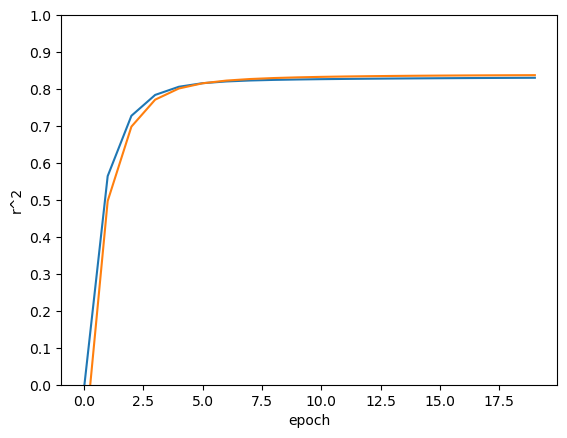

In [27]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('r^2')
plt.yticks([-1,-0.5, 0,0.1, 0.2, 0.3, 0.4 ,0.5, 0.6, 0.7 ,0.8, 0.9, 1])
plt.ylim(0,1)
plt.show()

In [28]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

1.0
0.8066143497757847


In [29]:
from sklearn.tree import plot_tree

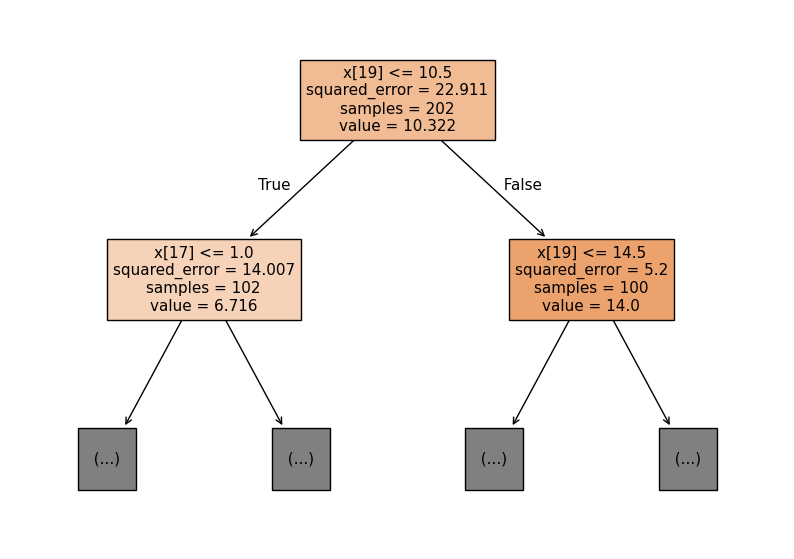

In [30]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True)
plt.show()
# 왼쪽 True, 오른 False

In [31]:
# descision tree - 교차검증 방법

In [32]:
scores = cross_validate(dt, sub_input, sub_target)#기본값: 5 fold cv
print(scores)

{'fit_time': array([0.0010016 , 0.00100017, 0.        , 0.00099993, 0.00099993]), 'score_time': array([0.        , 0.        , 0.00100017, 0.        , 0.        ]), 'test_score': array([0.7891575 , 0.84774188, 0.63083877, 0.52750146, 0.8543977 ])}


In [33]:
params = {'min_impurity_decrease': uniform(0.0001, 1),
                 'max_depth': randint(10, 50),
                 'min_samples_split': randint(2, 15),
                 'min_samples_leaf': randint(1, 25),    
}

In [34]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), params, n_iter=200, n_jobs=-1, random_state=42)

In [35]:
rs.fit(sub_input, sub_target)

RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F1B16150>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D7F5D1E6F0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F1A42BD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F1B40FE0>},
                   random_state=42)

In [36]:
print(rs.best_estimator_)

DecisionTreeRegressor(max_depth=12,
                      min_impurity_decrease=np.float64(0.007052130531190704),
                      min_samples_leaf=8, min_samples_split=12,
                      random_state=42)


In [37]:
scores = cross_validate(rs, sub_input, sub_target, return_train_score=True, n_jobs=-1)
print(scores)

{'fit_time': array([1.06705332, 1.06305337, 1.07596588, 1.06506634, 1.05504227]), 'score_time': array([0.00099993, 0.        , 0.        , 0.        , 0.00100017]), 'test_score': array([0.94030383, 0.86820268, 0.82930917, 0.73455996, 0.85323006]), 'train_score': array([0.8931204 , 0.89169949, 0.9113062 , 0.92301291, 0.90746   ])}


In [38]:
print(np.max(rs.cv_results_['mean_test_score']))

0.8512245603234204


In [39]:
dt = rs.best_estimator_

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9105986933590255
0.8580213493002917


In [40]:
print(dt.feature_importances_)

[0.00000000e+00 0.00000000e+00 7.61951034e-04 1.00253246e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.66098075e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.59314525e-04
 0.00000000e+00 1.59814002e-01 0.00000000e+00 8.27499589e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.79651330e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


In [41]:
dt

DecisionTreeRegressor(max_depth=12,
                      min_impurity_decrease=np.float64(0.007052130531190704),
                      min_samples_leaf=8, min_samples_split=12,
                      random_state=42)

In [42]:
dt = DecisionTreeRegressor(max_depth=12, min_impurity_decrease=0.007052130531190704, min_samples_leaf=8, min_samples_split=12, random_state=42)
scores = cross_validate(dt, sub_input, sub_target, return_train_score=True, n_jobs=-1) #기본값: 5 fold cv


dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))
print(dt.score(test_input, test_target))
print(scores)

0.9105986933590255
0.8580213493002917
0.8525165390888383
{'fit_time': array([0.00200176, 0.00100017, 0.00100017, 0.00100017, 0.00099993]), 'score_time': array([0.        , 0.        , 0.        , 0.00099993, 0.        ]), 'test_score': array([0.94030383, 0.89871977, 0.82930917, 0.73455996, 0.85323006]), 'train_score': array([0.8931204 , 0.90159965, 0.9113062 , 0.92301291, 0.90746   ])}


In [43]:
# 앙상블 방법

In [44]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor


In [45]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
scores = cross_validate(rf, sub_input, sub_target, return_train_score=True, cv=5, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9759803072877247 0.8394708077206644


In [46]:
scores

{'fit_time': array([0.08439136, 0.07735848, 0.07735825, 0.07533669, 0.08237934]),
 'score_time': array([0.01455665, 0.01405406, 0.01506758, 0.0150609 , 0.01455283]),
 'test_score': array([0.91718353, 0.89221689, 0.76189603, 0.73371401, 0.89234358]),
 'train_score': array([0.97443085, 0.97460921, 0.97627702, 0.9783983 , 0.97618616])}

In [47]:
rf.fit(sub_input, sub_target)

print(rf.score(sub_input, sub_target))
print(rf.score(val_input, val_target))

0.9759662105975891
0.8200446468609865


In [48]:
print(rf.feature_importances_)

[1.34254115e-03 7.84553178e-04 4.59766765e-03 1.88743386e-03
 9.63221834e-03 4.36632041e-04 1.01060556e-03 5.93974630e-03
 1.52130865e-03 2.62534601e-03 9.27544417e-04 1.02504531e-02
 5.40449045e-03 5.91783579e-03 8.01265244e-03 5.77717551e-03
 9.47846369e-03 1.29578472e-01 8.07130536e-03 7.72645338e-01
 1.89989735e-03 3.48516121e-04 7.13253072e-04 2.18270482e-03
 1.13361062e-03 3.21760045e-03 2.68767678e-03 7.57756760e-04
 1.21720021e-03]


In [49]:
rfo = RandomForestRegressor(oob_score=True, n_jobs=-1, random_state=42)
rfo.fit(sub_input, sub_target)
print(rfo.oob_score_)

0.8279528134048432


In [50]:
rf_params = {'n_estimators': randint(100, 1000),
                 'max_depth': randint(5, 50),
                 'min_samples_split': randint(5, 15),
                 'min_samples_leaf': randint(5, 50),    
}

In [51]:
rsf = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, 
                                   n_iter=200, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [52]:
rsf.fit(sub_input, sub_target)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F5CF36E0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F5CF1760>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F5CF1280>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F5CF25D0>},
                   random_state=42, verbose=2)

In [53]:
print(rsf.best_estimator_)
print(rsf.score(sub_input, sub_target))
print(rsf.score(val_input, val_target))

RandomForestRegressor(max_depth=37, min_samples_leaf=5, min_samples_split=13,
                      n_estimators=382, n_jobs=-1, random_state=42)
0.9130334234744476
0.8170162024435852


In [54]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42, max_depth=37, min_samples_leaf=5, min_samples_split=13,
                      n_estimators=382)
scores = cross_validate(rf, sub_input, sub_target, return_train_score=True, cv=5, n_jobs=-1)

rf.fit(sub_input, sub_target)

print(rf.score(sub_input, sub_target))
print(rf.score(val_input, val_target))
print(rf.score(test_input, test_target))
print(scores)

0.9130334234744477
0.8170162024435852
0.9088534735793694
{'fit_time': array([0.24816942, 0.25669432, 0.25518727, 0.26071095, 0.26071095]), 'score_time': array([0.0276134 , 0.02691984, 0.02640772, 0.027426  , 0.02591729]), 'test_score': array([0.92853907, 0.90386195, 0.80333147, 0.73892703, 0.87723664]), 'train_score': array([0.89918232, 0.89877852, 0.91931831, 0.9197872 , 0.9093176 ])}


In [55]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor(n_estimators=500, max_depth=15, bootstrap=True, n_jobs=-1, random_state=42)
scores = cross_validate(et, sub_input, sub_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9751346595638261 0.8180829792704694


In [56]:
et.fit(sub_input, sub_target)

print(et.score(sub_input, sub_target))
print(et.score(val_input,val_target))

0.9761558600163767
0.8105031003783356


In [57]:
etr = ExtraTreesRegressor(random_state=42)

et_params = {'n_estimators': randint(100, 1000),
                 'max_depth': randint(5, 50),
                 'min_samples_split': randint(5, 15),
                 'min_samples_leaf': randint(5, 50),    
}

In [58]:
random_search = RandomizedSearchCV(estimator=etr, param_distributions=et_params, 
                                   n_iter=200, cv=10, verbose=2, random_state=42, n_jobs=-1)

In [59]:
random_search.fit(sub_input, sub_target)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


RandomizedSearchCV(cv=10, estimator=ExtraTreesRegressor(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F1B91FD0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F1B92540>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F1B93EC0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F5CB7500>},
                   random_state=42, verbose=2)

In [60]:
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")
print(random_search.score(sub_input,sub_target))
print(random_search.score(val_input,val_target))

Best parameters: {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 9, 'n_estimators': 136}
Best score: 0.8044254764467358
0.9048909306714107
0.7980840805699132


In [61]:
et.fit(sub_input, sub_target)
print(et.feature_importances_)

[4.74869233e-03 5.63671414e-03 1.08521392e-02 5.94910441e-03
 1.16620077e-02 3.21898405e-03 2.97031286e-03 8.46340053e-03
 3.93066516e-03 6.99083124e-03 5.69625961e-03 1.44776002e-02
 6.03959246e-03 1.00504945e-02 6.39970824e-03 4.70337205e-03
 1.04012593e-02 4.32230361e-02 2.47435205e-01 5.51703419e-01
 6.42852655e-03 4.09862528e-04 3.12502727e-03 4.77063044e-03
 1.75469769e-03 4.80014989e-03 9.06490609e-03 1.82944809e-03
 3.26395263e-03]


In [62]:
from sklearn.ensemble import GradientBoostingRegressor

gd = GradientBoostingRegressor(random_state=42)
scores = cross_validate(gd, sub_input, sub_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9849367128655538 0.8325477825747518


In [63]:
gd = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42) # n_estimators : tree 갯수를 늘림(반복을 늘림), learning rate : 학습률을 조절해 손실함수의 기울기를 따라가는 보폭을 조절함
scores = cross_validate(gd, sub_input, sub_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
#모델 복잡도는 올라갔지만, test의 정확도는 낮아지지 않았으므로 과적합되지 않고 순수하게 모델의 성능이 향상되었음을 알 수 있음.

0.9652734966330749 0.8377870560583369


In [64]:
gd.fit(sub_input, sub_target)
print(gd.feature_importances_)

[3.01557047e-05 4.92565109e-04 8.12787117e-04 5.91633170e-04
 7.27649139e-03 1.51583143e-04 0.00000000e+00 6.82950123e-04
 4.66964265e-04 3.45025092e-03 2.24005782e-08 7.66010051e-03
 1.37086792e-03 2.89096313e-03 8.32872461e-03 4.58025220e-04
 6.14464230e-03 1.37668464e-01 1.14953886e-02 8.00891996e-01
 7.98553257e-04 2.66663275e-04 0.00000000e+00 2.32014408e-04
 7.46126302e-04 0.00000000e+00 6.69405594e-03 0.00000000e+00
 3.98011174e-04]


In [65]:
gd_params = {'n_estimators': randint(10, 100),
             'learning_rate': uniform(0.1, 0.5),
             'max_depth': randint(5, 30),
             'min_samples_split': randint(5, 15),
             'min_samples_leaf': randint(5, 50),
             'subsample': uniform(0.7, 0.3),
}

In [66]:
gdmodel = GradientBoostingRegressor(random_state=42)

In [67]:
gdrs = RandomizedSearchCV(estimator=gdmodel, param_distributions=gd_params, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [68]:
gdrs.fit(sub_input, sub_target)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D7F1B93AD0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F5E2F8F0>,
                                        'min_samples_leaf': <scipy.stats._distn_...zen object at 0x000002D7F6034EC0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F6036CC0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F6037500>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D7F6036DB0>},
                   random_state=42, verbose=2)

In [69]:
print(gdrs.best_estimator_)
print(gdrs.score(sub_input, sub_target))
print(gdrs.score(val_input, val_target))
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

GradientBoostingRegressor(learning_rate=np.float64(0.517990060256103),
                          max_depth=13, min_samples_leaf=16,
                          min_samples_split=9, n_estimators=10, random_state=42,
                          subsample=np.float64(0.7519882960212537))
0.9235166345485243
0.8098325493515839
0.9652734966330749 0.8377870560583369


In [70]:
gdtest = GradientBoostingRegressor(n_estimators=44, max_depth=18, min_samples_leaf=6, min_samples_split=7, learning_rate=0.1346806504375827, subsample=0.8009662644666179 , random_state=42) # n_estimators : tree 갯수를 늘림(반복을 늘림), learning rate : 학습률을 조절해 손실함수의 기울기를 따라가는 보폭을 조절함
scores = cross_validate(gdtest, sub_input, sub_target, return_train_score=True, n_jobs=-1, cv=5)

gdtest.fit(sub_input, sub_target)
print(gdtest.score(sub_input, sub_target))
print(gdtest.score(val_input, val_target))
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
print(scores)

0.9895294674678607
0.8079109805510871
0.9882162535650257 0.8260222049082685
{'fit_time': array([0.03283906, 0.02732253, 0.03283501, 0.03083777, 0.03183866]), 'score_time': array([0.00100088, 0.        , 0.        , 0.        , 0.00099993]), 'test_score': array([0.89003003, 0.90319894, 0.76582983, 0.6992226 , 0.87182963]), 'train_score': array([0.98487769, 0.98521803, 0.99124379, 0.9904105 , 0.98933125])}


In [71]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance

In [72]:
hgb = HistGradientBoostingRegressor(random_state=42)
scores = cross_validate(hgb, sub_input, sub_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
print(scores)

0.9496696972731428 0.8256436254909099
{'fit_time': array([0.02316046, 0.02416182, 0.02706337, 0.02806354, 0.02303028]), 'score_time': array([0.00100136, 0.00099945, 0.00100017, 0.00099969, 0.00099993]), 'test_score': array([0.88756373, 0.88409564, 0.74497387, 0.76578029, 0.84580459]), 'train_score': array([0.93982894, 0.94780788, 0.95246415, 0.95713681, 0.95111071])}


In [73]:
hgb.fit(sub_input, sub_target)
result = permutation_importance(hgb, sub_input, sub_target, n_repeats=10, random_state=42, n_jobs=-1)

print(result.importances_mean)

[8.34830059e-04 3.52776742e-03 5.94499595e-03 2.15009139e-03
 1.82985716e-03 1.83565883e-03 1.10322901e-03 7.19789106e-03
 3.08593992e-03 6.56500978e-04 4.17548321e-04 1.50336275e-02
 6.81513513e-03 3.53396682e-03 1.08964783e-02 3.32306900e-03
 1.91193159e-02 1.81701906e-01 2.60212425e-02 1.32568042e+00
 0.00000000e+00 0.00000000e+00 7.45907997e-04 2.79565603e-03
 0.00000000e+00 3.78940019e-04 4.32819287e-03 0.00000000e+00
 9.43527031e-05]


In [74]:
val_result = permutation_importance(hgb, val_input, val_target, n_repeats=10, random_state=42, n_jobs=-1)

print(val_result.importances_mean)

[-6.98581096e-04 -1.56097269e-03  1.40481691e-04 -1.40239989e-04
  3.47982630e-03 -1.24316088e-03  1.44195134e-03 -1.87921959e-02
  1.20035532e-02  2.68770555e-04  2.38477523e-03  2.07852173e-02
  4.15081041e-03  4.09343979e-04  2.47444514e-03  6.98162773e-03
  1.17233884e-03  1.51006789e-01  2.80058578e-02  1.18443708e+00
  0.00000000e+00  0.00000000e+00  2.39989014e-05  1.09594610e-03
  0.00000000e+00 -1.34516253e-04  9.14719579e-03  0.00000000e+00
  3.20734269e-04]


In [75]:
hgb.score(val_input, val_target)

0.8259831667618823

In [76]:
hgd_params = {'learning_rate': uniform(0.1, 0.5),
             'max_depth': randint(5, 30),
             'min_samples_leaf': randint(5, 50),
}

In [77]:
hgdrs = RandomizedSearchCV(estimator=hgb, param_distributions=hgd_params, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [78]:
hgdrs.fit(sub_input, sub_target)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=HistGradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D7F74DF7A0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F5D633B0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F74DFF50>},
                   random_state=42, verbose=2)

In [79]:
print(hgdrs.best_estimator_)
print(hgdrs.score(sub_input, sub_target))
print(hgdrs.score(val_input, val_target))
print(hgdrs.score(test_input, test_target))
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

HistGradientBoostingRegressor(learning_rate=np.float64(0.1894113546106644),
                              max_depth=28, min_samples_leaf=12,
                              random_state=42)
0.9979185761531665
0.8217677261852214
0.8947429668801544
0.9496696972731428 0.8256436254909099


In [80]:
hgb = HistGradientBoostingRegressor(learning_rate=0.1894113546106644,
                              max_depth=28, min_samples_leaf=12,random_state=42)
scores = cross_validate(hgb, sub_input, sub_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
print(scores)

0.9966589478721867 0.8247956833872709
{'fit_time': array([0.05906343, 0.06106329, 0.08007455, 0.06056905, 0.08057952]), 'score_time': array([0.00199986, 0.00150609, 0.00250602, 0.00199986, 0.00300121]), 'test_score': array([0.88016061, 0.88773263, 0.72356878, 0.78569635, 0.84682005]), 'train_score': array([0.99478196, 0.99669195, 0.99806305, 0.9969926 , 0.99676517])}


In [81]:
from lightgbm import LGBMRegressor

In [82]:
lgb = LGBMRegressor(random_state=42)
scores = cross_validate(lgb, sub_input, sub_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
print(scores)

0.9498863102492298 0.8237577959622616
{'fit_time': array([0.14891672, 0.16231418, 0.18484378, 0.1564219 , 0.17433763]), 'score_time': array([0.00199986, 0.00099993, 0.00099993, 0.00100017, 0.00100017]), 'test_score': array([0.88843843, 0.88415663, 0.74226462, 0.76306012, 0.84086918]), 'train_score': array([0.93995077, 0.94715783, 0.95297472, 0.95816954, 0.95117869])}


In [83]:
param_dist = {
    'num_leaves': randint(20, 50),  # LightGBM에서 리프의 최대 개수
    'max_depth': randint(3, 10),  # 트리의 최대 깊이
    'learning_rate': uniform(0.01, 0.2),  # 학습률
    'n_estimators': randint(100, 1000),  # 트리의 개수
    'min_child_samples': randint(5, 50),  # 리프 노드가 가져야 할 최소 데이터 수
    'subsample': uniform(0.6, 0.4),  # 데이터 샘플링 비율
    'colsample_bytree': uniform(0.6, 0.4)  # 트리별 샘플링 비율
}

In [84]:
random_search = RandomizedSearchCV(estimator=lgb, param_distributions=param_dist, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [85]:
random_search.fit(sub_input, sub_target)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 133
[LightGBM] [Info] Number of data points in the train set: 202, number of used features: 29
[LightGBM] [Info] Start training from score 10.321782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D7F744A060>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D7F1B41B80>,
                                        'max_depth': <scipy.stats._distn_infrastruc...
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F74492B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F1B419D0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D7F1B17500>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D7F7448740>},
                   random_state=42, verbose=2)

In [86]:
print(random_search.best_estimator_)
print(random_search.score(sub_input, sub_target))
print(random_search.score(val_input, val_target))
print(random_search.score(test_input, test_target))
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

LGBMRegressor(colsample_bytree=np.float64(0.7203513239267079),
              learning_rate=np.float64(0.06696809887549353), max_depth=3,
              min_child_samples=6, n_estimators=741, num_leaves=47,
              random_state=42, subsample=np.float64(0.6205915004999957))
0.9977456471297893
0.7922109841818057
0.8889200670866924
0.9498863102492298 0.8237577959622616


In [87]:
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [89]:
model1 = DecisionTreeRegressor(max_depth=4) 
model2 = RandomForestRegressor(max_depth=4)
model3 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Voting Regressor 초기화
voting_model = VotingRegressor(estimators=[('dt', model1), ('rf', model2), ('gbr', model3)])

# 교차 검증을 통한 성능 평가
scores = cross_val_score(voting_model, sub_input, sub_target, cv=5, scoring='neg_mean_squared_error')
cross_scores = cross_validate(voting_model, sub_input, sub_target, cv=5,  return_train_score=True, n_jobs=-1)
print(f"Mean Squared Error: {-scores.mean()}")
print(scores)
print(cross_scores)

Mean Squared Error: 3.463546538858793
[-2.00080073 -2.9389886  -4.50221256 -4.55010891 -3.32562189]
{'fit_time': array([0.10646558, 0.10392666, 0.10343289, 0.10743284, 0.10443282]), 'score_time': array([0.00199986, 0.00150633, 0.00300002, 0.00206184, 0.00200009]), 'test_score': array([0.91898832, 0.89751536, 0.77568653, 0.73473078, 0.84932165]), 'train_score': array([0.96291156, 0.96246804, 0.97255355, 0.96958046, 0.96956415])}


In [90]:
# DecisionTreeRegressor의 하이퍼파라미터 분포 정의
dt_param_dist = {
          'min_impurity_decrease': uniform(0.001, 0.1),
          'max_depth': randint(3, 20),
          'min_samples_split': randint(5, 20),
          'min_samples_leaf': randint(5, 30),    
}

## RandomForestRegressor의 하이퍼파라미터 분포 정의
rf_param_dist = {
    'n_estimators': randint(50, 1000),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(5, 20),
    'min_samples_leaf': randint(5, 30)
}

# GradientBoostingRegressor의 하이퍼파라미터 분포 정의
gbr_param_dist = {
    'n_estimators': randint(10, 100),
    'learning_rate': uniform(0.1, 0.5),
    'max_depth': randint(3, 30),
    'min_samples_split': randint(5, 20),
    'min_samples_leaf': randint(5, 30),
    'subsample': uniform(0.7, 0.3)
}

# DecisionTreeRegressor 모델 초기화 및 RandomizedSearchCV 적용
dt = DecisionTreeRegressor(random_state=42)
dt_random_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), 
                        dt_param_dist, n_iter=200, n_jobs=-1, random_state=42)
dt_random_search.fit(sub_input, sub_target)
best_dt = dt_random_search.best_estimator_

# RandomForestRegressor 모델 초기화 및 RandomizedSearchCV 적용
rf = RandomForestRegressor(random_state=42)
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_dist, 
                                      n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_random_search.fit(sub_input, sub_target)
best_rf = rf_random_search.best_estimator_

# GradientBoostingRegressor 모델 초기화 및 RandomizedSearchCV 적용
gbr = GradientBoostingRegressor(random_state=42)
gbr_random_search = RandomizedSearchCV(estimator=gbr, param_distributions=gbr_param_dist, 
                                       n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
gbr_random_search.fit(sub_input, sub_target)
best_gbr = gbr_random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [91]:
# 최적의 모델들을 사용하여 Voting Regressor 구성
voting_regressor = VotingRegressor(estimators=[
    ('dt', best_dt),
    ('rf', best_rf),
    ('gbr', best_gbr)
])

# Voting Regressor 학습
voting_regressor.fit(sub_input, sub_target)

# 예측 및 평가
predictions = voting_regressor.predict(sub_input)

# 평가 지표 계산
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(sub_target, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(sub_target, predictions)
r2 = r2_score(sub_target, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 1.7739429972214922
Root Mean Squared Error: 1.3318945142996468
Mean Absolute Error: 0.8296131476149218
R^2 Score: 0.9225734724838286


In [92]:
print(dt_random_search.best_estimator_)
print(rf_random_search.best_estimator_)
print(gbr_random_search.best_estimator_)

DecisionTreeRegressor(max_depth=18,
                      min_impurity_decrease=np.float64(0.007107795985486376),
                      min_samples_leaf=8, min_samples_split=5, random_state=42)
RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=13,
                      n_estimators=860, random_state=42)
GradientBoostingRegressor(learning_rate=np.float64(0.2079105137484216),
                          max_depth=7, min_samples_leaf=11, min_samples_split=8,
                          n_estimators=15, random_state=42,
                          subsample=np.float64(0.7155045163505822))


In [93]:
model1 = DecisionTreeRegressor(max_depth=18,
                      min_impurity_decrease=0.007107795985486376,
                      min_samples_leaf=8, min_samples_split=5, random_state=42)
model2 = RandomForestRegressor(max_depth=6, min_samples_leaf=6, min_samples_split=3,
                      n_estimators=291, random_state=42)
model3 = GradientBoostingRegressor(learning_rate=0.20061436940479066,
                          max_depth=7, min_samples_split=15, n_estimators=280,
                          random_state=42,
                          subsample=0.8289169876683353)

# Voting Regressor 초기화
voting_model = VotingRegressor(estimators=[('dt', model1), ('rf', model2), ('gbr', model3)])

# 교차 검증을 통한 성능 평가
scores = cross_val_score(voting_model, sub_input, sub_target, cv=5, scoring='neg_mean_squared_error')
cross_scores = cross_validate(voting_model, sub_input, sub_target, cv=5,  return_train_score=True, n_jobs=-1)
print(f"Mean Squared Error: {-scores.mean()}")
print(scores)
print(cross_scores)

Mean Squared Error: 2.932276747487863
[-1.62992075 -2.71313987 -3.70996698 -4.05231763 -2.5560385 ]
{'fit_time': array([0.31294274, 0.31544805, 0.31194162, 0.31544781, 0.31444788]), 'score_time': array([0.00550628, 0.00600004, 0.00550628, 0.00550604, 0.00499988]), 'test_score': array([0.93415925, 0.90894086, 0.81366313, 0.7628837 , 0.88459997]), 'train_score': array([0.95553819, 0.95745854, 0.96364525, 0.96626791, 0.96014472])}


In [113]:
model1.fit(train_input, train_target)
print(model1.score(train_input, train_target))
print(model1.score(test_input, test_target))

model2.fit(train_input, train_target)
print(model2.score(train_input, train_target))
print(model2.score(test_input, test_target))

model3.fit(train_input, train_target)
print(model3.score(train_input, train_target))
print(model3.score(test_input, test_target))

0.9072574581484887
0.8783106779496405
0.9170119851993613
0.8976568743895671
0.999999999948172
0.8352929242373945


In [94]:
vm = voting_model.fit(sub_input, sub_target)

predictions = vm.predict(sub_input)

r2 = r2_score(sub_target, predictions)
print(f"R^2 Score: {r2}")

R^2 Score: 0.9617615434542279


In [95]:
val_pre = vm.predict(val_input)
val_r2 = r2_score(val_target, val_pre)

print(val_r2)

0.8441381825664691


In [96]:
t_pre = vm.predict(test_input)
test_r2 = r2_score(test_target, t_pre)

print(test_r2)

0.8984442996537764


In [97]:
print(vm.score(sub_input, sub_target))
print(vm.score(val_input, val_target))
print(vm.score(test_input, test_target))

0.9617615434542279
0.8441381825664691
0.8984442996537764


In [98]:
# test 파일 전처리

In [99]:
student_test = pd.read_csv("C:\\Users\\USER\\Downloads\\test.csv")

In [100]:
student_test_encoded = pd.get_dummies(student_test, columns=['Fjob', 'reason'])

In [101]:
student_test = student_test_encoded.replace({'yes': 1, 'no': 0, 'True':1, 'False':0, 'GP':1, 'MS':0, 'F':1, 'M':0, 'U':1, 'R':0, 'T':1, 'A':0})

C:\Users\USER\AppData\Local\Temp\ipykernel_20188\3792065510.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  student_test = student_test_encoded.replace({'yes': 1, 'no': 0, 'True':1, 'False':0, 'GP':1, 'MS':0, 'F':1, 'M':0, 'U':1, 'R':0, 'T':1, 'A':0})


In [102]:
pre_test_data = select_columns_except(student_test, ['famsize', 'G3','school','age','aderess', 'Pstatus', 'Medu','failures','nersery', 'internet','higher','Mjob','guardian'])
# , 'G2', 'G1'

In [103]:
test_input = pre_test_data[pre_test_data.columns[:]].to_numpy()

In [104]:
test_target = student_test['G3'].to_numpy()

In [105]:
# train 데이터 정리

In [106]:
pre_train_data = select_columns_except(student_data, ['famsize', 'G3','school','age','aderess', 'Pstatus', 'Medu','failures','nersery', 'internet','higher','Mjob','guardian'])

In [107]:
train_input = pre_train_data[pre_train_data.columns[:]].to_numpy()

In [108]:
train_target = student_data['G3'].to_numpy()

In [109]:
vm = voting_model.fit(train_input, train_target)

In [110]:
print(vm.score(train_input, train_target))
print(vm.score(test_input, test_target))

0.9638181941425967
0.8926046648302827


In [117]:
pre_t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                80 non-null     int64
 1   address            80 non-null     int64
 2   Fedu               80 non-null     int64
 3   traveltime         80 non-null     int64
 4   studytime          80 non-null     int64
 5   schoolsup          80 non-null     int64
 6   famsup             80 non-null     int64
 7   paid               80 non-null     int64
 8   activities         80 non-null     int64
 9   nursery            80 non-null     int64
 10  romantic           80 non-null     int64
 11  famrel             80 non-null     int64
 12  freetime           80 non-null     int64
 13  goout              80 non-null     int64
 14  Dalc               80 non-null     int64
 15  Walc               80 non-null     int64
 16  health             80 non-null     int64
 17  absences          

In [118]:
pre_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                317 non-null    int64
 1   address            317 non-null    int64
 2   Fedu               317 non-null    int64
 3   traveltime         317 non-null    int64
 4   studytime          317 non-null    int64
 5   schoolsup          317 non-null    int64
 6   famsup             317 non-null    int64
 7   paid               317 non-null    int64
 8   activities         317 non-null    int64
 9   nursery            317 non-null    int64
 10  romantic           317 non-null    int64
 11  famrel             317 non-null    int64
 12  freetime           317 non-null    int64
 13  goout              317 non-null    int64
 14  Dalc               317 non-null    int64
 15  Walc               317 non-null    int64
 16  health             317 non-null    int64
 17  absences        